In [1]:
import yfinance as yf

In [2]:
def getStock(tic,period):
    ticker = yf.Ticker(tic)
    df = ticker.history(period=period)
    return df.values[:,:4],df.index

In [3]:
stock = 'AMZN'
data,ts = getStock(stock,'1y')

In [4]:
print(len(data))

253


In [5]:
from All_Functions_Master_File import rsi,adder

In [6]:
my_data = rsi(data,14,3,4)

/Users/kahingleung/PycharmProjects/timeseries/All_Functions_Master_File.py:168: RuntimeWarning: Mean of empty slice.
  Data[i, where] = (Data[i - lookback + 1:i + 1, close].mean())
/Users/kahingleung/PycharmProjects/timeseries/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [7]:
my_data[-1,4]

65.69062633371902

In [8]:
n=len(my_data)
print(n)
print(len(ts[-n:]))

172
172


In [9]:
from darts import TimeSeries
import numpy as np
#series = TimeSeries.from_times_and_values(ts[-n:],my_data[:,4],fill_missing_dates=True, freq='D')
series = TimeSeries.from_values(np.float32(my_data[:,4]))


In [10]:
train, val = series[:100], series[100:]

In [11]:
from darts.models import NBEATSModel
model = NBEATSModel(input_chunk_length=14, output_chunk_length=5)



In [12]:
model.fit(train)

[2021-11-11 01:03:24,936] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 82 samples.
[2021-11-11 01:03:24,936] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 82 samples.
[2021-11-11 01:03:24,998] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 32-bits; casting model to float32.
[2021-11-11 01:03:24,998] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 32-bits; casting model to float32.


In [13]:
pred = model.predict(n=len(val),series=train)
#pred = model.predict(n=len(val))

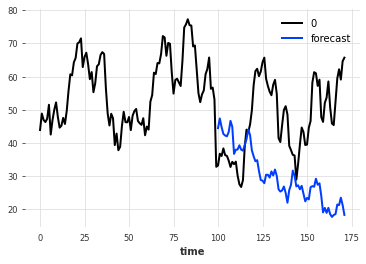

In [14]:
import matplotlib.pyplot as plt

series.plot()
pred.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [15]:
from darts.metrics import mase
err = mase(series,pred,train)
print(err)

5.77327


In [16]:
def OnePrediction(hist,model,future):
    hist_series = TimeSeries.from_values(np.float32(hist))
    pred = model.predict(n=future,series=hist_series)
    return pred.mean()[0]
    
    

In [17]:
my_data = adder(my_data,20)

In [18]:
def simple_rsi_signal(Data, rsi_col,threshold, buy, sell):
    high = 100 - threshold
    low = threshold
    Data[:,buy] = 0
    Data[:,sell] = 0
    for i in range(len(Data)):
        
        if Data[i, rsi_col] < low and i > 14:
            
            Data[i, buy] = 1
            
        elif Data[i, rsi_col] > high:
            
            Data[i, sell] = -1    
    return Data

In [19]:
my_data[:,5:10] = 0
my_data = simple_rsi_signal(my_data,4,30,5,6)

In [20]:
print(my_data[:,5])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [21]:
import Primal_Functions_Performance_Evaluation 

In [22]:
import importlib
importlib.reload(Primal_Functions_Performance_Evaluation)


expected_cost = 0.01
lot = 1
investment = 100
my_data_ret = Primal_Functions_Performance_Evaluation.holding(my_data, 5, 6, 7, 8)


In [23]:
my_data_eq = Primal_Functions_Performance_Evaluation.equity_curve(my_data_ret, 7, expected_cost, lot, investment)
Primal_Functions_Performance_Evaluation.performance(my_data_eq, 7, my_data, stock,expected_cost, lot, investment)

-----------Performance----------- AMZN
Hit ratio       =  38.46 %
Net profit      =  $ 166.6
Expectancy      =  $ 12.81 per trade
Profit factor   =  1.44
Total Return    =  166.6 %

Average Gain    =  $ 108.94 per trade
Average Loss    =  $ -47.26 per trade
Largest Gain    =  $ 517.32
Largest Loss    =  $ -170.31

Realized RR     =  2.31
Minimum         = $ -252.09
Maximum         = $ 278.07
Trades          = 13


166.6

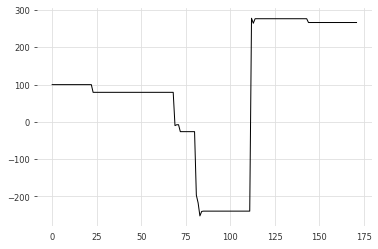

In [24]:
plt.plot(my_data_eq[:, 3], linewidth = 1, label = stock)

In [25]:
def predicted_rsi_signal(Data, rsi_col,threshold,input_chunk_length, buy, sell):
    high = 100 - threshold
    low = threshold
    Data[:,buy] = 0
    Data[:,sell] = 0
    for i in range(len(Data)):
        if Data[i, rsi_col] < low and i > input_chunk_length:
            u = OnePrediction(Data[i-input_chunk_length:i+1, rsi_col] , model, 5)
            if u > Data[i, rsi_col]*1.1 :
                Data[i, buy] = 1
            
        elif Data[i, rsi_col] > 70 and i > input_chunk_length:
            u = OnePrediction(Data[i-input_chunk_length:i+1, rsi_col] , model, 5)
            if u < Data[i, rsi_col]:
                Data[i, sell] = -1    
    return Data

In [26]:
my_data[:,9:13] = 0
my_data = predicted_rsi_signal(my_data,4,40,14,9,10)

In [27]:
print(my_data[:,9])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [28]:
my_data_ret = Primal_Functions_Performance_Evaluation.holding(my_data, 9, 10, 11, 12)

In [29]:
my_data_eq = Primal_Functions_Performance_Evaluation.equity_curve(my_data_ret, 11, expected_cost, lot, investment)
Primal_Functions_Performance_Evaluation.performance(my_data_eq, 11, my_data, stock,expected_cost, lot, investment)

-----------Performance----------- AMZN
Hit ratio       =  45.83 %
Net profit      =  $ 588.35
Expectancy      =  $ 24.51 per trade
Profit factor   =  2.09
Total Return    =  588.35 %

Average Gain    =  $ 102.77 per trade
Average Loss    =  $ -41.7 per trade
Largest Gain    =  $ 390.95
Largest Loss    =  $ -170.31

Realized RR     =  2.46
Minimum         = $ 79.38
Maximum         = $ 840.54
Trades          = 24


588.35

No handles with labels found to put in legend.
No handles with labels found to put in legend.


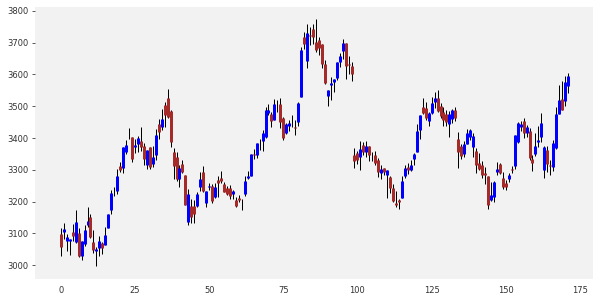

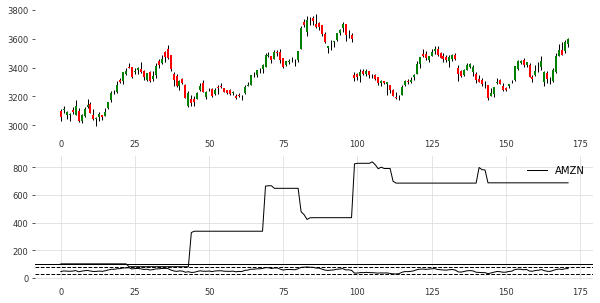

In [30]:
import Primal_Functions_Signal_Chart
import Primal_Functions_Double_Panel_Plotting
upper_barrier    = 75
lower_barrier    = 25
Primal_Functions_Signal_Chart.signal_chart_ohlc_color(my_data, stock, 3, 6, 7, window = 500)
Primal_Functions_Double_Panel_Plotting.indicator_plot_double(my_data, 0, 1, 2, 3, 4, window = 250)
plt.axhline(y = upper_barrier, color = 'black', linewidth = 1, linestyle = '--')
plt.axhline(y = lower_barrier, color = 'black', linewidth = 1, linestyle = '--')    

plt.plot(my_data_eq[:, 3], linewidth = 1, label = stock)
plt.grid()
plt.legend()
plt.axhline(y = investment, color = 'black', linewidth = 1)

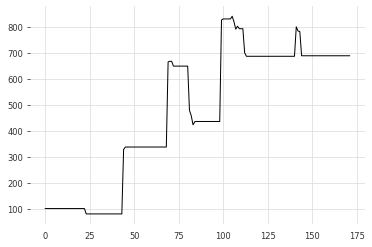

In [31]:
plt.plot(my_data_eq[:, 3], linewidth = 1, label = stock)

In [32]:
import pandas as pd
df = pd.read_csv('backtest_rsi_signals.csv')

In [33]:
df['performance'] = df[['baseline','ML']].apply(lambda x: x[1] - x[0], axis=1)

In [34]:
list = df.loc[(df.performance>0),'asset' ].values

In [35]:
print(len(list))

67


In [36]:
list = df.loc[(df.ML>0),'asset' ].values

In [37]:
print(len(list))

57
